<a href="https://colab.research.google.com/github/JARIN-TIAS/DataAnalysis-/blob/main/textanalyticscdsrDOCTOR_CRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import necessary basic data analysis libraries

import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


###Loading Doctor CRM Data

In [2]:
doctor_crm = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/Doctor_crm_data.xlsx')

###Checking Data

In [ ]:
doctor_crm.head(5)

,SL,Agent,Name,Brand,Phone,Query Type,Caller Patient,Verbatim,Call Status,Created at
0,1,Sumaiya,NaN,Square Toiletries,1950709602,caller hung up,Inbound,silent,Silent,2024-10-24 08:01:24
1,2,Sumaiya,NaN,Square Toiletries,1804357662,prank,Inbound,prank,Prank,2024-10-24 08:09:38
2,3,Samana,NaN,Square Toiletries,1742833648,prank,Inbound,NaN,Prank,2024-10-24 08:13:34
3,4,Sumaiya,NaN,Square Toiletries,1784719364,caller hung up,Inbound,silent,Silent,2024-10-24 09:06:29
4,5,Samana,NaN,Square Toiletries,1917431263,prank,Inbound,NaN,Prank,2024-10-24 09:24:26


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame with an 'Agent' column
agent_performance = doctor_crm['Agent'].value_counts().reset_index()
agent_performance.columns = ['Agent', 'Number of Calls']

# Creating a pie chart
fig = px.pie(agent_performance,
             names='Agent',
             values='Number of Calls',
             title='Agent Performance: Number of Calls Handled',
             color='Agent',  # Color by agent
             color_discrete_sequence=px.colors.qualitative.Plotly)  # Using a qualitative color palette

# Show the figure
fig.show()


# **Agents with different brands**

In [3]:
# Count the number of calls for each agent and brand combination
call_counts = doctor_crm.groupby(['Agent', 'Brand']).size().reset_index(name='Number of Calls')

# Create a faceted bar chart with gradients
fig = px.bar(call_counts,
             x='Brand',
             y='Number of Calls',
             color='Number of Calls',  # Use Number of Calls for color gradient
             color_continuous_scale='Oranges',  # Choose a gradient color scale
             facet_col='Agent',
             title='Agent-Brand Relationship: Number of Calls',
             labels={'Number of Calls': 'Number of Calls'},
             text='Number of Calls')

# Customizing the layout
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Calls',
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the figure
fig.show()

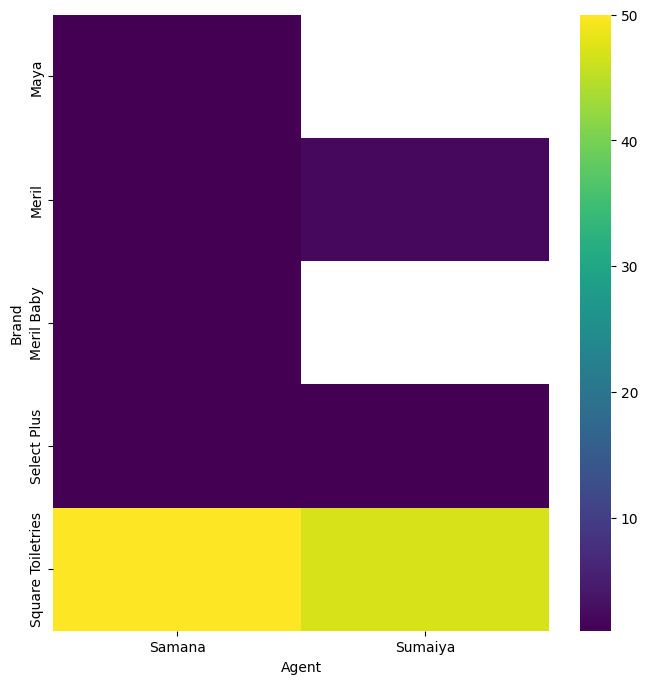

In [ ]:
# @title Agent vs Brand

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Brand'].value_counts()
    for x_label, grp in doctor_crm.groupby('Agent')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Agent')
_ = plt.ylabel('Brand')

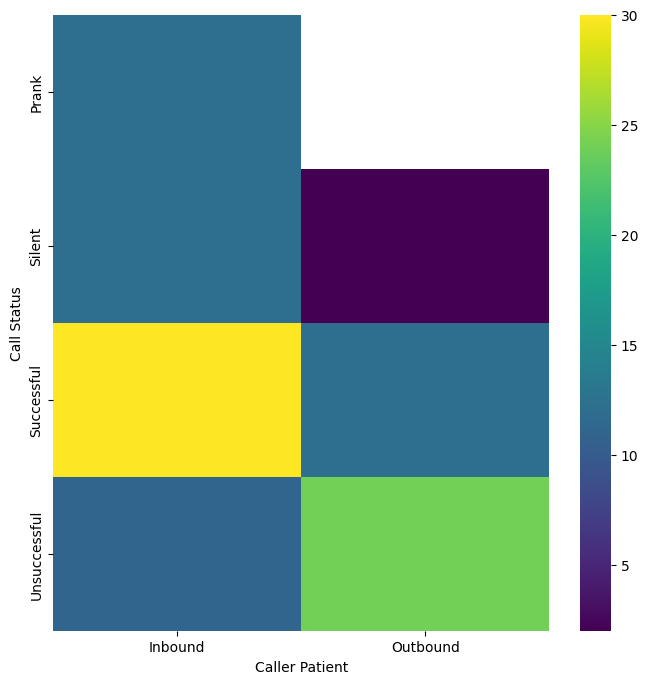

In [ ]:
# @title Caller Patient vs Call Status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Call Status'].value_counts()
    for x_label, grp in doctor_crm.groupby('Caller Patient')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Caller Patient')
_ = plt.ylabel('Call Status')

###IDC Data

In [ ]:
idc_survey = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/IDC_Survey_Sample.xlsx')

In [ ]:
idc_survey.head(5)

,So Name,Agent Name,Phone Number,Brand,Date of Birth,Gender,Address,Daily Achievement in Net Delivery Value,Incentive,Trade Promotion,...,Score (MTD Sales),এই মাসে আপনি সর্বোচ্চ কত টাকা ইন্সেন্টিভ উপার্জন করতে পারবেন মনে করছেন?,Response (Incentive Achievement),Score (Incentive Achievement),ট্রেড প্রমোশন নলেজ চেক,Response (Trader Promotion),Score (Trader Promotion),আপনি কি আপনার বন্ধুকে আইডিসিতে কাজ করার পরামর্শ দেবেন?,Response (Referance),Score (Referance)
0,Bikash Roy,Farzana,1738714139,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,15000,Yes,2.0,Yes,Yes,2.0,Yes,Yes,2.0
1,Minhaj Miah,Afsana,1733818154,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,15300,Yes,2.0,yes,Yes,2.0,yes,Yes,2.0
2,Milton Bapary,Afsana,1837903742,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Basudev Shaha,Farzana,1742384879,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,NaN,7500,NaN,NaN,Yes,Yes,2.0,Yes,Yes,2.0
4,Assiduzzman Ahide,Farzana,1710960137,J&J,NaN,Male,NaN,NaN,NaN,NaN,...,2.0,7000,NaN,NaN,Yes,Yes,2.0,Yes,Yes,2.0


###Senora Data

In [ ]:
senora_survey = pd.read_excel('https://github.com/sadathasan4/cdsrtextanalytics/raw/refs/heads/main/Senora_Survey_Sample1.xlsx')

In [ ]:
senora_survey.head(5)

,Form Name,Name,Profession,Family Income,Education,Age,Gender,Contact No,Alt Contact No,Address,...,Q13.আপনি কি সুগন্ধ যুক্ত স্যানিটারি ন্যাপকিন ব্যবহার করতে পছন্দ করেন ?,Design_ Preference1: দেখানো স্যানিটারি ন্যাপকিন গুলোর মধ্যে ফ্লোরাল ডিজাইন দেখে আপনার সবচেয়ে পছন্দের ১ম ন্যাপকিন ডিজাইনটি সিলেক্ট করুন।,Design_ Preference 2: স্যানিটারি ন্যাপকিন গুলোর মধ্যে ফ্লোরাল ডিজাইন দেখে আপনার পছন্দের উপর ভিত্তি করে ১ম ন্যাপকিনটি বাদে ২য় একটি ডিজাইন সিলেক্ট করুন।,Design_Preference 3: স্যানিটারি ন্যাপকিন গুলোর মধ্যে ফ্লোরাল ডিজাইন দেখে আপনার পছন্দের উপর ভিত্তি করে ২য় ন্যাপকিনটি বাদে ৩য় একটি ডিজাইন সিলেক্ট করুন।,DG1:অন্যান্য ডিজাইনটিগুলোর চেয়ে ১ম ডিজাইনটি কেন বেশি ভালো লেগেছে ? অনুগ্রহ করে কারণগুলো বলুন।,DG2:আপনার সিলেক্ট করা প্রথম ডিজাইনটি সার্বিকভাবে দেখে এটি কি ধরণের ন্যাপকিন হতে পারে বলে মনে হচ্ছে ?,BP Full Name,BP Location,Submited Date,Unnamed: 52
0,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Munni,Home Maker,20000-30000 taka,Below S.S.C,31-35 Years,Female,1314749887,1314749887,Muslim nogor hasem madborar bari,...,"(হ্যাঁ)\nযদি পছন্দ করে থাকেন, তাহলে সুগন্ধ যুক...",F,F,F,NaN,NaN,BP 1 Narayanganj BP111,Patiya,2024-07-05 01:22:16,NaN
1,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Choya moni,Student,20000-30000 taka,S.S.C,Below 20 years,Female,1314749887,1314749887,"Muslimnagar,Hasem madbor",...,"(হ্যাঁ)\nযদি পছন্দ করে থাকেন, তাহলে সুগন্ধ যুক...",C,E,B,sundor,nah,BP 1 Narayanganj BP111,Patiya,2024-07-05 01:23:30,NaN
2,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Choya moni,Student,20000-30000 taka,S.S.C,Below 20 years,Female,1314749887,1314749887,"Muslimnagar,Hasem madbor",...,()\n\n,NaN,NaN,NaN,NaN,NaN,BP 1 Narayanganj BP111,Nārāyanganj,2024-09-20 02:27:04,NaN
3,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Choya moni,Student,20000-30000 taka,S.S.C,Below 20 years,Female,1314749887,1314749887,"Muslimnagar,Hasem madbor",...,()\n\n,NaN,NaN,NaN,NaN,NaN,BP 1 Narayanganj BP111,Nārāyanganj,2024-09-20 02:32:40,NaN
4,ফেমিনা বেল্ট সিস্টেম স্যানিটারি ন্যাপকিন এর উপ...,Taslima,Home Maker,20000-30000 taka,S.S.C,21-25 Years,Female,1323549655,132359655,Narayan gonj,...,(না)\n\n,E,C,B,Colour,NaN,BP 1 Narayanganj BP111,Patiya,2024-07-05 11:19:39,NaN
